Đào tạo Mạng nơ-ron hồi quy (RNN) trong TensorFlow

1. Nhập thư viện Pandas , NumPy , Matplotlib , Seaborn , TensorFlow , Keras , NLTK và Scikit-learn để triển khai.

In [ ]:
import warnings
from tensorflow.keras.utils import pad_sequences     #Đệm chuỗi để xử lý các chuỗi có độ dài khác nhau.
from tensorflow.keras.preprocessing.text import Tokenizer   #Tokenization để chuyển đổi văn bản thành vectơ số.
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras  #Keras và TensorFlow để xây dựng và đào tạo mạng nơ-ron.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import re
import nltk     # Natural Language Toolkit (NLTK) để xử lý ngôn ngữ tự nhiên.
nltk.download('all')
from nltk.corpus import stopwords       #Loại bỏ các từ dừng (stop words) không mang nhiều ý nghĩa trong phân tích văn bản.
from nltk.tokenize import word_tokenize     #Tokenization để chia văn bản thành các từ hoặc câu riêng biệt.
from nltk.stem import WordNetLemmatizer    #Lemmatization để chuyển đổi từ về dạng gốc của nó.
lemm = WordNetLemmatizer()

warnings.filterwarnings("ignore")



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[

2. Tải tập dữ liệu

In [18]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Clothing-Review.csv")
print(data.head(7))

data = data[data['Class Name'].isnull() == False]

   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   
5         1080   49  Not for the very petite   
6          858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue t

3. Thực hiện phân tích dữ liệu

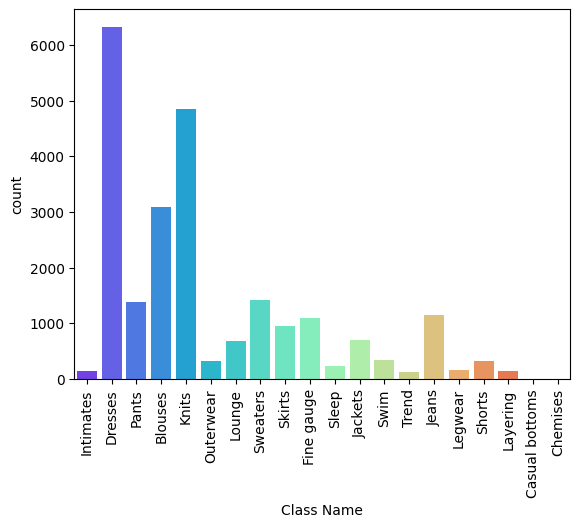

In [3]:
sns.countplot(data=data, x='Class Name', palette='rainbow')
plt.xticks(rotation=90)
plt.show()

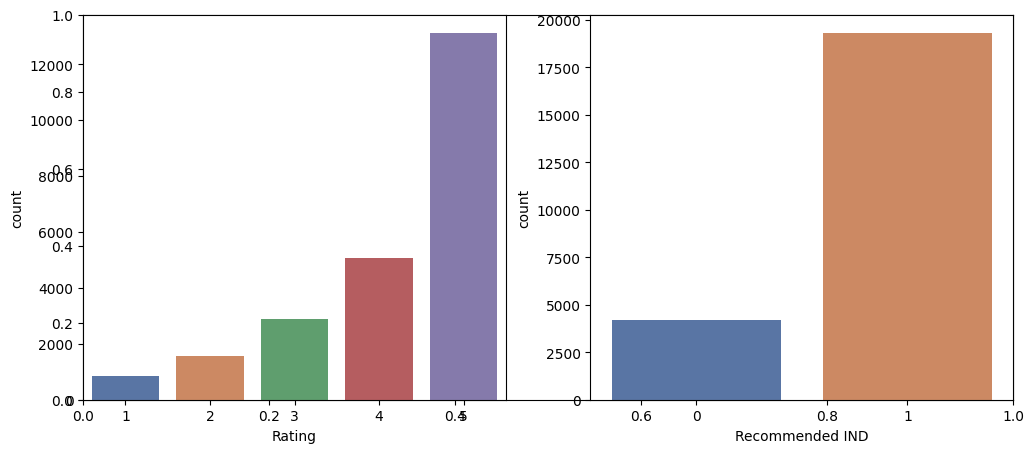

In [4]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Rating',palette="deep")

plt.subplot(1, 2, 2)
sns.countplot(data=data, x="Recommended IND", palette="deep")
plt.show()

In [5]:
fig = px.histogram(data, marginal='box',
                   x="Age", title="Age Group",
                   color="Recommended IND",
                   nbins=65-18,
                   color_discrete_sequence=['green', 'red'])
fig.update_layout(bargap=0.2)

In [6]:
fig = px.histogram(data,
                   x="Age",
                   marginal='box',
                   title="Age Group",
                   color="Rating",
                   nbins=65-18,
                   color_discrete_sequence
                   =['black', 'green', 'blue', 'red', 'yellow'])
fig.update_layout(bargap=0.2)

4. Chuẩn bị dữ liệu để xây dựng mô hình

In [8]:
def filter_score(rating):
    return int(rating > 3)

features = ['Class Name', 'Title', 'Review Text']

X = data[features]
y = data['Rating']
y = y.apply(filter_score)

5. Tiền xử lý văn bản

In [9]:
def toLower(data):
    if isinstance(data, float):
        return '<UNK>'
    else:
        return data.lower()

stop_words = stopwords.words("english")

def remove_stopwords(text):
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

X['Title'] = X['Title'].apply(toLower)
X['Review Text'] = X['Review Text'].apply(toLower)

X['Title'] = X['Title'].apply(remove_stopwords)
X['Review Text'] = X['Review Text'].apply(remove_stopwords)

X['Title'] = X['Title'].apply(lambda x: lemm.lemmatize(x))
X['Review Text'] = X['Review Text'].apply(lambda x: lemm.lemmatize(x))

X['Title'] = X['Title'].apply(remove_punctuation_func)
X['Review Text'] = X['Review Text'].apply(remove_punctuation_func)

X['Text'] = list(X['Title']+X['Review Text']+X['Class Name'])


X_train, X_test, y_train, y_test = train_test_split(
    X['Text'], y, test_size=0.25, random_state=42)

6. Mã hóa

Trong Tokenization, chúng tôi chuyển đổi văn bản thành Vector. Keras API hỗ trợ tiền xử lý văn bản.

Các vectơ là biểu diễn số của dữ liệu để máy có thể dễ dàng hiểu và sử dụng để đào tạo.

In [10]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

7. Xử lý sắp xếp văn bản.giúp xây dựng các mô hình có cùng kích thước, giúp việc huấn luyện các mô hình mạng nơ-ron dễ dàng hơn.

In [11]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

train_pad = pad_sequences(train_seq,
                          maxlen=40,
                          truncating="post",
                          padding="post")
test_pad = pad_sequences(test_seq,
                         maxlen=40,
                         truncating="post",
                         padding="post")

8. Xây dựng mạng nơ-ron hồi quy (RNN) trong TensorFlow

In [12]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=40))
model.add(keras.layers.SimpleRNN(64, return_sequences=True))
model.add(keras.layers.SimpleRNN(64))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.build(input_shape=(None, 40))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 40, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 40, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,057 (4.99 MB)

 Trainable params: 1,309,057 (4.99 MB)

 Non-trainable params: 0 (0.00 B)

9. Đào tạo mô hình

In [13]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
              

history = model.fit(train_pad,
                    y_train,
                    epochs=5)

Epoch 1/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.7774 - loss: 0.5030
Epoch 2/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.8049 - loss: 0.4204
Epoch 3/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.8307 - loss: 0.3813
Epoch 4/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8621 - loss: 0.3243
Epoch 5/5
551/551 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8827 - loss: 0.2859
